# Resolucao_Lista1

Gerson Jr

# Questões

## Q1 - Gerador RANDU

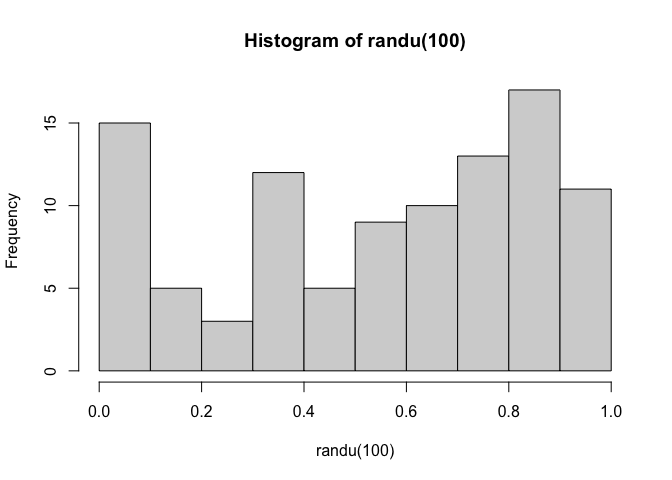

In [ ]:
#Criar uma funcão para Gerador RANDU em R
randu <- function(n, seed = 1, modulo = 2^31) {
  x <- seed
  u <- numeric(n) 
  for (i in 1:n) {
    x <- (65539 * x) %% modulo
    u[i] <- x / modulo
  }
  return(u)
}

randu(100) |> hist()

## Q2 - Gerador Aleatorio - sequencia

In [ ]:
gerador_seq <- function(n){
  x <- numeric(n)  
  x[1] <- 23
  x[2] <- 66
  
  for (i in 3:n) {
    x[i] <- (3 * x[i - 1] + 5 * x[i - 2]) %% 100
  }
  
  u <- x / 100
  
  list(xn = x, un = u)
}

In [ ]:
n <- 14
resultado <- gerador_seq(n)
resultado$xn

 [1] 23 66 13 69 72 61 43 34 17 21 48 49 87  6

## Q3 - Função de probabilidade

> Usando a função inversa temos:

In [ ]:
F_x <- function() {
  repeat {
    u <- runif(1)
    if (u <= 1/3) {
      return(1)
    } else {
      return(2)
    }
  }
}

-   N = 100

    ``` r
    n = 100
    resultado <- purrr::map_dbl(1:n, ~ F_x())
    resultado |> janitor::tabyl()
    ```

         resultado  n percent
                 1 44    0.44
                 2 56    0.56

-   N = 1000

    ``` r
    n = 1000
    resultado <- purrr::map_dbl(1:n, ~ F_x())
    resultado |> janitor::tabyl()
    ```

         resultado   n percent
                 1 329   0.329
                 2 671   0.671

-   N = 10000

    ``` r
    n = 10000
    resultado <- purrr::map_dbl(1:n, ~ F_x())
    resultado |> janitor::tabyl()
    ```

         resultado    n percent
                 1 3277  0.3277
                 2 6723  0.6723

## Q4 - Se U ~ (0,1), então:

a\) $1 - U => U(0,1)$

1.  ${-1\over \lambda} log(U) => exp(\lambda)$

## Q5 - Gerar valores de uma distruibuição de laplace

Aplicando a transformação temos $$ f(x) $$

Se $x < a$, temos: $$ f(x) $$

Se $x >= a$, temos: $$ f(x) $$

Assim: $$ F_x(x)^-1 =  $$

In [ ]:
  dist_laplace <- function(n = 1, a = 0, b = 1){
    U = runif(n)
    X <- ifelse(U <= 0.5, 
      a + b * log(2 * U), 
      a - b * log(2 * (1 - U)))
  return(X)
}

In [ ]:
#install.packages('VGAM')

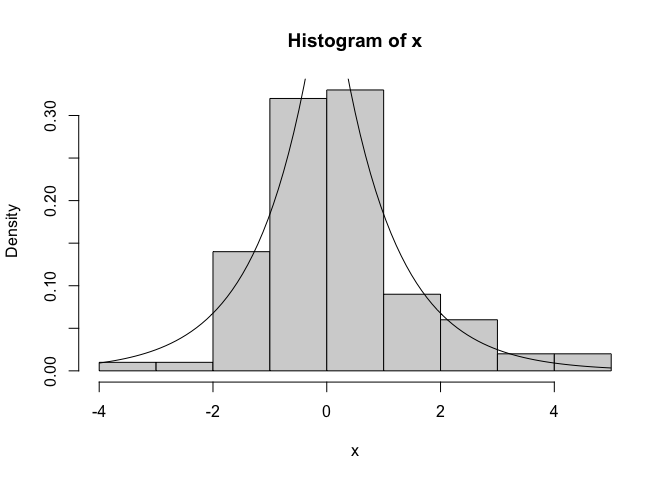

In [ ]:
n = 100
a = 0
b = 1
x = dist_laplace(n = n, a = a, b = b)

hist(x, probability = TRUE)
curve(VGAM::dlaplace(x = x, location = a, scale = b), add = TRUE)

## Q6) Fotebol

#### a) Simular resultados dos jogos

$$
\omega = (derrota, empate, triunfo)
$$

In [ ]:
F_x <- function(n) {
  resultado <- character(n)
  for (i in 1:n) {
  u <- runif(1)
  resultado[i] <- dplyr::case_when(
    u <= .2 ~ 'Derrota',
    u <= .5 ~ 'Empate',
    TRUE ~ 'Triunfo'
  )
  }
  return(resultado)
}

F_x(n=19) |> janitor::tabyl() |> print()

 F_x(n = 19)  n    percent
     Derrota  1 0.05263158
      Empate  4 0.21052632
     Triunfo 14 0.73684211

#### b) Simulação de resultado

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  28.00   29.50   33.00   32.47   34.50   40.00 

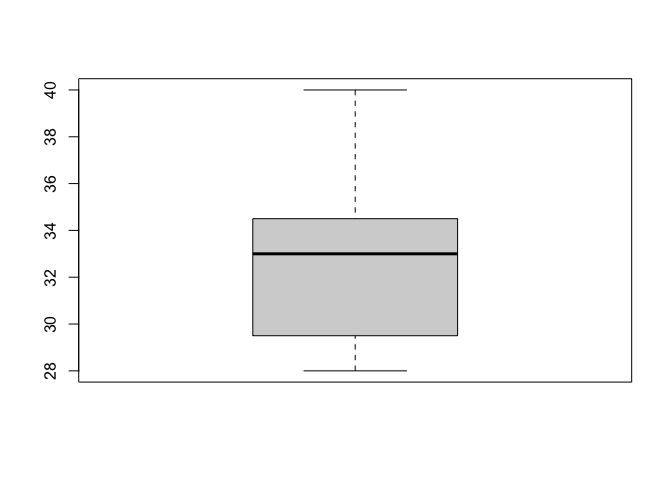

In [ ]:
simular_campanha <- function(n_camp){
  resultado_camp <- numeric(n_camp)
  for(i in 1:n_camp) {
   resultado_camp[i] <- as.numeric(sum(table(F_x(n = 19))*c(0, 1, 3)))
  }
  return(resultado_camp)
  }

resultados = simular_campanha(n_camp = 15) 
summary(resultados) |> print()

## Q7) Gerar valores

$$
F(x) = {x^2 + x \over 2}, 0 <= x <= 1
$$

-   **Metodo da inversa**

    ``` r
    metodo_invesa <- function(n) {
      u <- runif(n)
      x <- (-1 + sqrt(1 + 8 * u)) / 2
      return(x)
    }

    n <- 10000
    resultados <- metodo_invesa(n)

    dF <- deriv(~ (x^2 + x)/2, "x")

    hist(resultados, breaks = 30, probability = TRUE, 
         main = "Distribuição dos valores gerados", col = "lightblue")
    curve((2 * x + 1)/2, from = 0, to = 1, add = TRUE, col = "red", lwd = 2)
    ```

    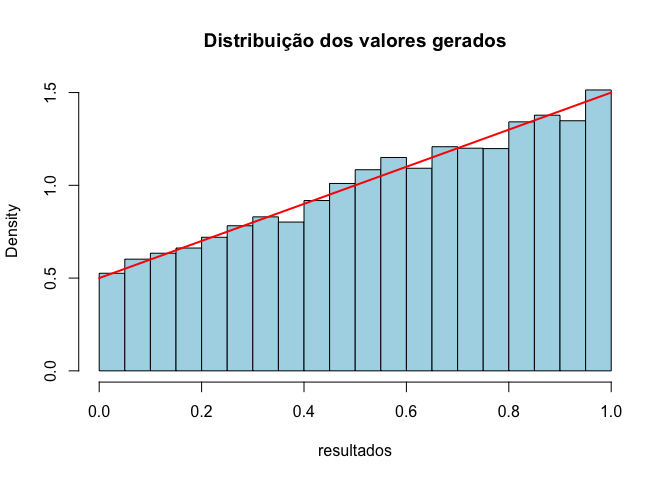

-   **Metodo da rejição**

    ``` r
    # Função de X
    f_x <- function(x) {return(x)}

    metodo_rejeicao <- function(n) {
      amostras <- c()

      while (length(amostras) < n) {
        x <- runif(1, min = 0, max = 1)
        u <- runif(1, min = 0, max = 1)

        if (u <= f_x(x)) {
          amostras <- c(amostras, x)
        }
      }

      return(amostras)
    }

    n <- 10000
    resultados <- metodo_rejeicao(n)

    hist(resultados, breaks = 30, probability = TRUE, 
         main = "Distribuição dos valores gerados (Método da Rejeição)", col = "lightblue")
    curve((2 * x + 1)/2, from = 0, to = 1, add = TRUE, col = "red", lwd = 2)
    ```

    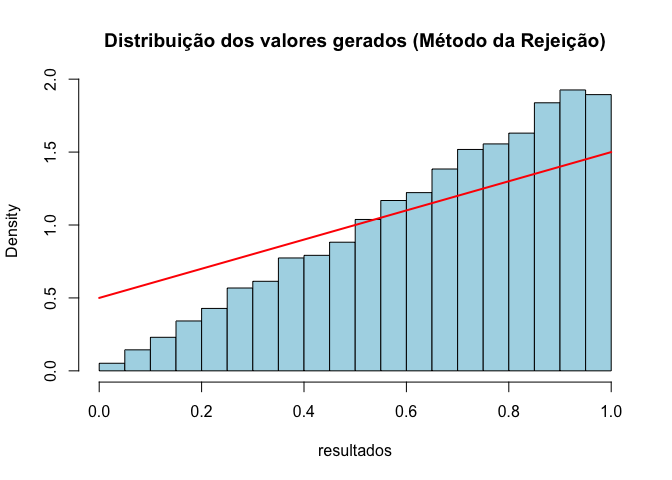

-   **Comparar os resultados**

    ``` r
    n <- 1000
    amostra = runif(n, min = 0, max = 1)

    F_x <- function(x) {return((x^2 + x) / 2)}

    resultado_real = purrr::map_dbl(amostra, F_x)
    resultado_metodo_inversa <- metodo_invesa(n)
    resultado_metodo_rejeicao <- metodo_rejeicao(n)

    mae_inversa <- mean(abs(resultado_real - resultado_metodo_inversa))
    mae_rejeicao <- mean(abs(resultado_real - resultado_metodo_rejeicao))

    cat("Para n =",n, "Temos: Erro Médio Absoluto (Inversa):", mae_inversa, "\n")
    ```

        Para n = 1000 Temos: Erro Médio Absoluto (Inversa): 0.3721831 

    ``` r
    cat("Para n =",n, "Temos: Erro Médio Absoluto (Rejeição):", mae_rejeicao, "\n")
    ```

        Para n = 1000 Temos: Erro Médio Absoluto (Rejeição): 0.3807088 

## Q8)

$f(x) = 30(x^2 - 2x^3 + x^4), onde 0 <= x <= 1$

Olhando o gráfico da f(x), um bom candidato seria $x - x^2$

Usando o metodo da rejeição, temos:


 Aceito Rejeito 
 0.1712  0.8288 

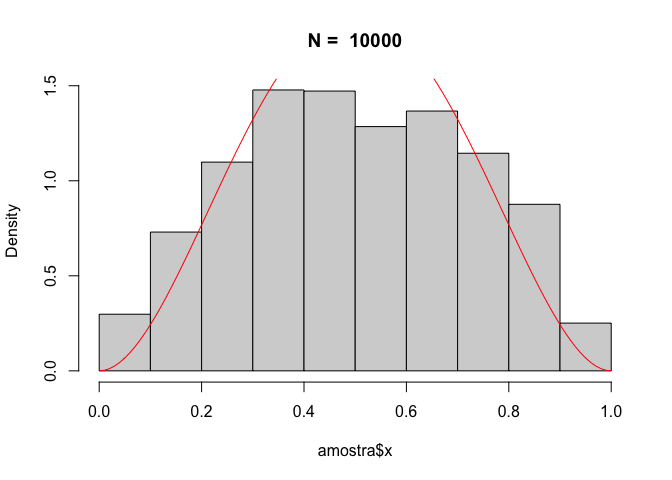

In [ ]:
f_x <- function(x) {x - x^2} 

metodo_rejeicao <- function() {
  repeat {
    x <- runif(n = 1, min = 0, max = 1)
    u <- runif(n = 1, min = 0, max = 1)

    if (u <= f_x(x)) {
      return(list(x = x, contagem = "Aceito"))
    } else {
      return(list(x = NA, contagem = "Rejeito"))
    }
  }
}

n = 10000
amostra <- purrr::map_df(1:n, ~metodo_rejeicao())  

amostra$contagem |>
  table() |>
  prop.table() |>
  print()

## Q9)

Usando o metodo da inversa.

1.  Encontrar a acumulada de Y, dado que $Y = X^{(1/a)}$

    $$F_y(y) = P(Y <= y) = P(X^{(1/a)} = y)$$

    $$P({(X{1/a}})a <= y^a) <=> P(X <= y^a)$$

2.  Sabendo que $F_x(x) = 1 - e^{-x}$, temos:

    $F_Y(y) = 1 - e^{-(y^a)}$

3.  Encontar a inversa:

    $U = 1 - e^{-(y^a)}$

    $U - 1= e^{-(y^a)} [-1]$

    $1 - U = e^{-(y^a)} [log]$

    $log(1 - U) = -y^a [-1]$

    $y^a = -log(1 - U)$

    $y = {(-log(1 - u))}^{1/a}$

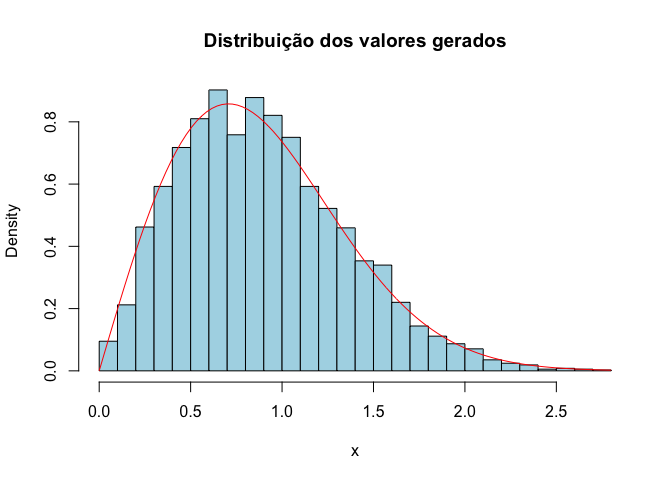

In [ ]:
metodo_invesa <- function(n, a) {
  u <- runif(n)
  x <- (-1 - log(1 - u))^(1/a) 
  return(x)
}

n <- 10000
a <- 2
x <- metodo_invesa(n, a)


hist(x, breaks = 30, probability = TRUE, 
     main = "Distribuição dos valores gerados", col = "lightblue")

curve(dweibull(x, shape = a, scale = 1), from = 0, add = TRUE, col = 'red')

## Q10)

> Prove que: \> Se $U_1$ e $U_2$ são iid, então $X_1$ e $X_2$ também são

In [ ]:
 1

[1] 1

## Q11)

In [1]:
# Box-Muller: exp(1)
dist.normal.exp <- function(n) {
  
  gerar_valor <- function() {
    repeat {
      y1 <- rexp(1, rate = 1)
      y2 <- rexp(1, rate = 1)
      
      if (y2 > ((1 - y1)^2) / 2) {
        u <- runif(1, min = 0, max = 1)
        return(ifelse(u <= 0.5, y1, -y1))
      }
    }
  }
  
  x <- purrr::map_dbl(1:n, ~ gerar_valor())
  return(x)
}

In [6]:
# Box-Muller: uniforme(1)
dist.normal.u <- function(n) {
  
  gerar_valor <- function() {
    repeat {
      y1 <- 2 * runif(1) - 1
      y2 <- 2 * runif(1) - 1
      
      y3 <- y1^2 + y2^2
      
      if (y3 < 1) { 
        z1 <- y1 * sqrt(-2 * log(y3) / y3)
        return(z1) 
      }
    }
  }
  
  x <- purrr::map_dbl(1:n, ~ gerar_valor())
  return(x)
}

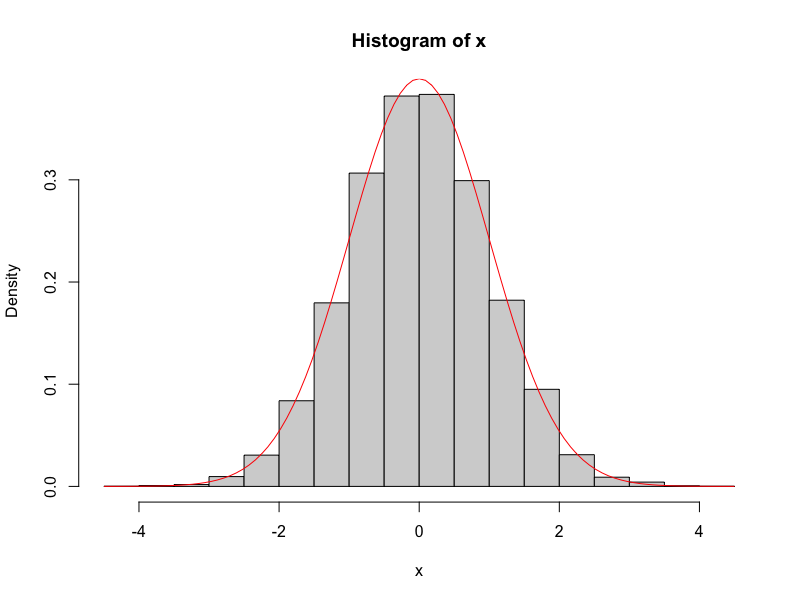

In [2]:
n <- 10000
inicio_M1 <- Sys.time() 
x <- dist.normal.exp(n)
hist(x, probability = TRUE)
curve(dnorm(x), add = TRUE, col = 'red')
fim_M1  <- Sys.time()

print(paste0("Box-Muller: exponecial: ", fim_M1 - inicio_M1,"s"))

[1] "Box-Muller: Uniforme: 0.129976987838745s"


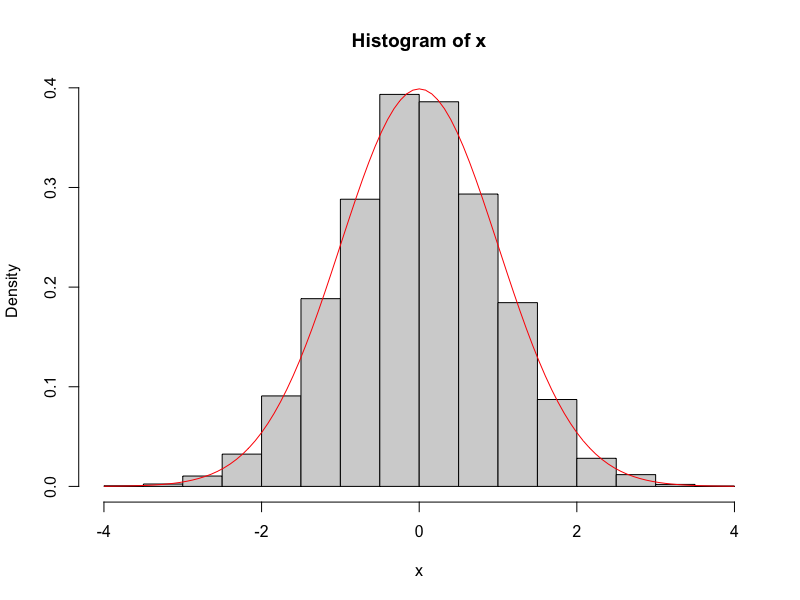

In [7]:
n <- 10000
inicio_M1 <- Sys.time() 
x <- dist.normal.u(n)
hist(x, probability = TRUE)
curve(dnorm(x), add = TRUE, col = 'red')
fim_M1  <- Sys.time()

print(paste0("Box-Muller: Uniforme: ", fim_M1 - inicio_M1,"s"))

\> O metodo visto em sala de aula mostrou ser mais eficiente.

## Q12)

In [ ]:
#install.packages("corpcor")

In [ ]:
gerar_mult_normal <- function(N, Mi, Sigma) {
tryCatch({
    if (!corpcor::is.positive.definite(Sigma)) {
      stop("A matriz Sigma não é positiva definida")
    }
    
    A <- t(chol(Sigma))
    Z <- matrix(rnorm(n * length(mu)), ncol = length(mu))
    X <- Z %*% A + matrix(rep(mu, each = n), nrow = n, byrow = TRUE)
    return(X)
  }, error = function(e) {
    message("Erro: ", e$message)
    return(NULL) 
  })
}

mi=c(1,2,3)
s <- matrix(c(3, -2, 1,-2, 5, 3,1, 3, 4),
            nrow = 3,
            byrow = TRUE)

amostra <- gerar_mult_normal(100, mi, s)

Erro: A matriz Sigma não é positiva definida

NULL